In [1]:
#
from obspy.taup import TauPyModel
from numpy import zeros, int8

model = TauPyModel("iasp91")

xs = range(95,166,5)
dds = range(0,620,5)

rbin = zeros(len(xs)*len(dds)).reshape(len(xs),len(dds))


In [2]:
for ii,xdist in enumerate(xs):
    tmp0 = model.get_travel_times(0,xdist/2.,["S"])
    print(xdist)
    for jj,ddepth in enumerate(dds):
        tmp1 = model.get_travel_times(ddepth,xdist/2.,["S"])
        time = tmp1[0].time*2. - tmp0[0].time*2.
        if time > 0.0:
            print('error')
        else:
            rbin[ii,jj] = time

95
100
105
110
115
120
125
130
135
140
145
150
155
160
165


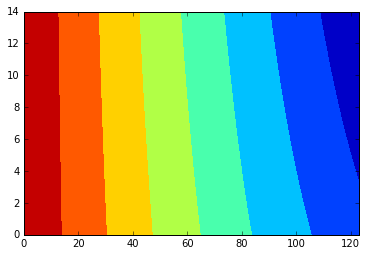

In [19]:
plt.contourf(rbin)

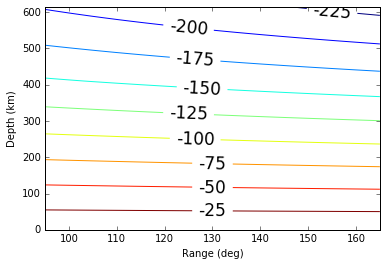

In [4]:
%matplotlib inline
from matplotlib import pylab as plt

CS4 = plt.contour(xs, dds, rbin.T, 10, aspect='auto')
plt.clabel(CS4, fmt='%2d', colors='k', fontsize=17)
_,_ = plt.ylabel('Depth (km)'), plt.xlabel('Range (deg)')

In [20]:
from scipy.interpolate import interp2d

x,y,z = [],[],[]
for ii,xdist in enumerate(xs):
    for jj,ddepth in enumerate(dds):
        x.append(xdist)
        y.append(ddepth)
        z.append((rbin[ii,jj]))
        
f = interp2d(x, y, z, kind='cubic')
f2= interp2d(x, z, y, kind='cubic')

/Users/mancinelli/anaconda/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=22,51 m=1860 fp=0.000011 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/Users/mancinelli/anaconda/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=22,27 m=1860 fp=0.265621 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


<a list of 14 text.Text objects>

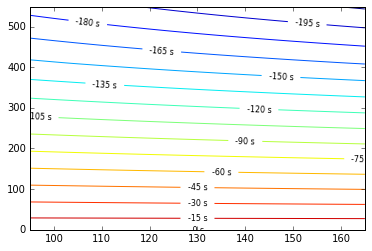

In [27]:
depths = range(0,550)

wbin = zeros(len(xs)*len(depths)).reshape(len(xs),len(depths))

for ii,xdist in enumerate(xs):
    for jj,depth in enumerate(depths):
        wbin[ii,jj] = f(xdist,depth)
        
CS = plt.contour(xs, depths, wbin.T, 15, aspect='auto')
plt.clabel(CS, fmt='%2d s', colors='k', fontsize=8)

<a list of 14 text.Text objects>

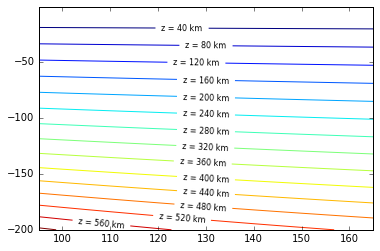

In [28]:
times = range(-200,0)

wbin = zeros(len(xs)*len(times)).reshape(len(xs),len(times))

for ii,xdist in enumerate(xs):
    for jj,time in enumerate(times):
        wbin[ii,jj] = f2(xdist,time)
        
CS = plt.contour(xs, times, wbin.T, 15, aspect='auto')
plt.clabel(CS, fmt='z = %2d km', colors='k', fontsize=8)

In [33]:
import pickle
file=open('migrator.pickle','wb')
pickle.dump(f, file)
file.close()

file=open('migrator_reverse.pickle','wb')
pickle.dump(f2, file)
file.close()